# This is a notebook to test rendering OpenAI Gym environments on Windows

In [57]:
import math

%matplotlib inline
import matplotlib.pyplot as plt

In [58]:
import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [59]:
import gymnasium as gym

## Show available envrionments

In [60]:
#all_envs = list(gym.envs.registry.all())
all = gym.envs.registry
all_envs = [all[key] for key in all.keys()]


In [61]:
all_envs[:10]

[EnvSpec(id='CartPole-v0', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=0),
 EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=1),
 EnvSpec(id='MountainCar-v0', entry_point='gymnasium.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='MountainCar', version=0),
 EnvSpec(id='MountainCarContinuous-v0'

In [62]:
def plot_environment(env, title='', figsize=(5,4)):
    plt.figure(figsize=figsize)
    env.reset()
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    plt.title(title)
    return img

In [63]:
def plot_env_list(names, nrows=1, figsize=(14, 6)):
    n = len(names)
    ncols = math.ceil(n / nrows)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for name, ax in zip(names, axes.flatten()):
        env = gym.make(name, render_mode="rgb_array").env
        obs = env.reset()
        img = env.render()
        ax.imshow(img)
        ax.set_title(name)
    return fig

## Render some environments 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

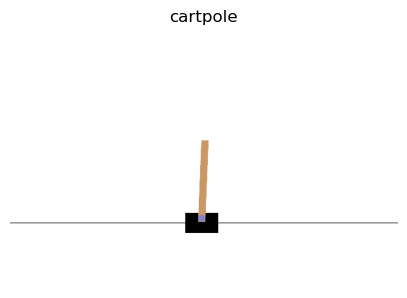

In [64]:
env = gym.make('CartPole-v1', render_mode='rgb_array').env
plot_environment(env, title="cartpole")

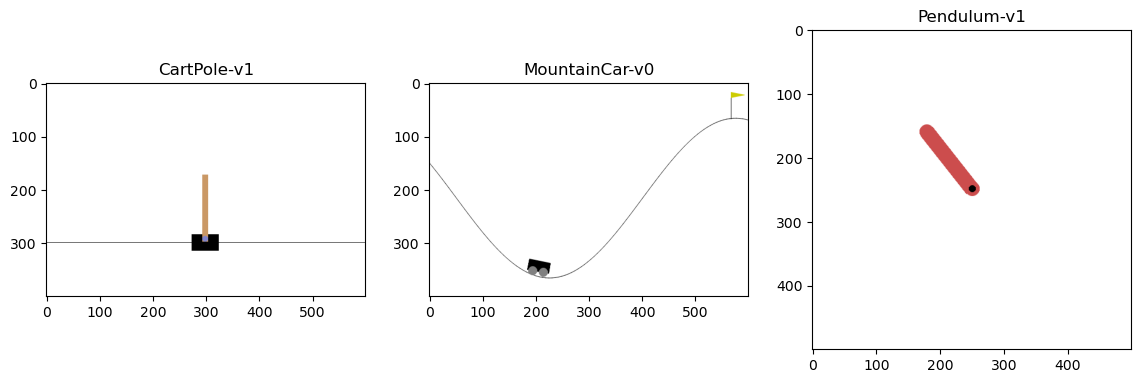

In [65]:
fig = plot_env_list(['CartPole-v1', 'MountainCar-v0', 'Pendulum-v1'], nrows=1, figsize=(14,8))

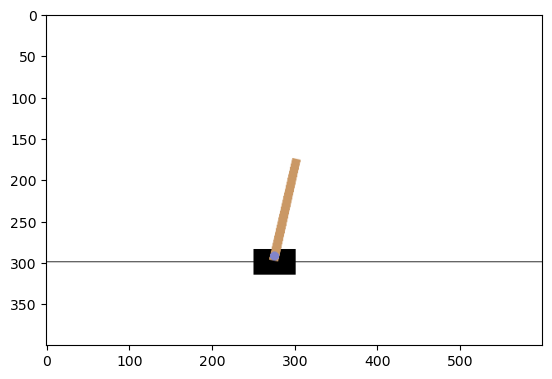

In [69]:
from IPython import display as ipythondisplay

env = gym.make("CartPole-v1", render_mode="rgb_array").env
env.reset()
prev_screen = env.render()

for i in range(16):
    action = env.action_space.sample()
    obs, reward, done, info, _ = env.step(action)
    screen = env.render()
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    
    if done:
        break
    
ipythondisplay.clear_output(wait=True)
env.close()